## 학습 데이터 준비
- 평당 현재 가격 기준 비율별 데이터 나누기
- train_set, test_set
-
- feature, target 나누기
- x_train, y_train, x_test, y_test

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
readD = pd.read_csv('sub-data-files/train_data_1.csv')
readD.info()
readD.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   apt_floor                3576 non-null   float64
 1   period_completed         3576 non-null   float64
 2   pyung                    3576 non-null   float64
 3   price_per_pyung_present  3576 non-null   float64
 4   gg_ratio                 3576 non-null   float64
 5   seo_ratio                3576 non-null   float64
 6   gw_ratio                 3576 non-null   float64
 7   kospi200                 3576 non-null   float64
 8   kospi200construct        3576 non-null   float64
 9   kosdaq                   3576 non-null   float64
 10  dowjones                 3576 non-null   float64
 11  shanghai                 3576 non-null   float64
 12  exchange_rate            3576 non-null   float64
 13  gold                     3576 non-null   float64
 14  oil                     

,apt_floor,period_completed,pyung,price_per_pyung_present,gg_ratio,seo_ratio,gw_ratio,kospi200,kospi200construct,kosdaq,...,gold,oil,export,import,cpi_living,real_estate_ccsi,gg_loan,housing_loan_rate,seo_gg_pop_ratio,price_cat
0,5.0,9.0,14.00,10597928.0,1.00,1.84,0.52,250.08,533.66,467.61,...,1600.0,88.06,44667681.0,41976900.0,97.897,97.0,170013.8,4.64,0.85,3.0
1,10.0,9.0,14.00,10443214.0,1.01,1.87,0.53,250.08,533.66,467.61,...,1600.0,88.06,44667681.0,41976900.0,97.897,97.0,170013.8,4.64,0.85,3.0
2,7.0,2.0,34.82,8912198.0,1.19,2.19,0.62,250.08,533.66,467.61,...,1600.0,88.06,44667681.0,41976900.0,97.897,97.0,170013.8,4.64,0.85,2.0
3,11.0,20.0,37.28,5592844.0,1.89,3.50,0.99,250.08,533.66,467.61,...,1600.0,88.06,44667681.0,41976900.0,97.897,97.0,170013.8,4.64,0.85,1.0
4,1.0,20.0,22.31,4611170.0,2.30,4.24,1.20,250.08,533.66,467.61,...,1600.0,88.06,44667681.0,41976900.0,97.897,97.0,170013.8,4.64,0.85,1.0


In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_idx, test_idx in split.split(readD, readD["price_cat"]): # readD['price_cat'] 분포 유지
    train_set = readD.loc[train_idx]
    test_set = readD.loc[test_idx]

In [4]:
train_set['price_cat'].value_counts() / len(train_set)

4.0    0.2501
2.0    0.2501
1.0    0.2501
3.0    0.2497
Name: price_cat, dtype: float64

In [5]:
for set_ in (train_set, test_set):
    set_.drop('price_cat', axis=1, inplace=True)

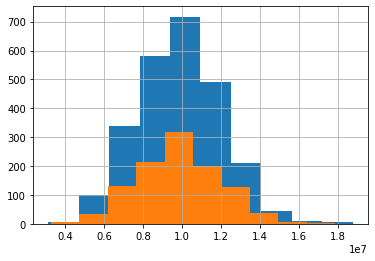

In [6]:
train_set['price_per_pyung_present'].hist()
test_set['price_per_pyung_present'].hist()
plt.show()

In [7]:
x_train = train_set.drop('price_per_pyung_present', axis=1)
y_train = train_set['price_per_pyung_present'].copy()
x_test =  test_set.drop('price_per_pyung_present', axis=1)
y_test = test_set['price_per_pyung_present'].copy()

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

data_pipeline = Pipeline([
        ('selector', DataFrameSelector(list(x_train))),
        ('std_scaler', StandardScaler()),
    ])

x_train_nor = data_pipeline.fit_transform(x_train)
x_test_nor = data_pipeline.fit_transform(x_test)

## LinearRegression, Ridge, Lasso

In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [11]:
lr = LinearRegression()
lr.fit(x_train_nor, y_train)
# print(lr.coef_)
# print(lr.intercept_)
print('train score: ', lr.score(x_train_nor, y_train))
print('test score: ', lr.score(x_test_nor, y_test))

train score:  0.8831923076275787
test score:  0.8952035350415201


In [12]:
rlr = Ridge(alpha=5)
rlr.fit(x_train_nor, y_train)
print('train score: ', rlr.score(x_train_nor, y_train))
print('test score: ', rlr.score(x_test_nor, y_test))

train score:  0.8830253241390749
test score:  0.8952604243986301


In [13]:
# rlr10 = Ridge(alpha=10)
# rlr10.fit(x_train_nor, y_train)

# rlr1 = Ridge(alpha=1)
# rlr1.fit(x_train_nor, y_train)

# rlr01 = Ridge(alpha=0.1)
# rlr01.fit(x_train_nor, y_train)

# plt.plot(rlr10.coef_, '^')
# plt.plot(rlr1.coef_, 's')
# plt.plot(rlr01.coef_, 'v')
# plt.show()

In [14]:
llr = Lasso(alpha=0.01, max_iter=100000)
llr.fit(x_train_nor, y_train)
print('train score: ', llr.score(x_train_nor, y_train))
print('test score: ', llr.score(x_test_nor, y_test))

train score:  0.8831923076275691
test score:  0.8952035369398506


In [15]:
llr.coef_

array([   93735.26560725,  -108092.39957706,  -122314.01956059,
        -327208.86984665,  -205836.66239857, -1474831.23783774,
         156038.23968877,  -241570.09196024,     3657.18181063,
        -116813.97428891,   -23143.67103989,    81737.73707193,
          10068.01853266,   136206.72941271,     8642.5052869 ,
        -124130.92050314,  -567300.74946515,    48878.94401683,
        1239205.99304897,   137921.34096669,  -114530.02495585])

In [16]:
import seaborn as sns

# corr_df = pd.DataFrame(x_train_nor, columns=list(x_train))
# corr_df['price'] = y_train
# matrix_corr = corr_df.corr()
# plt.figure(figsize=(30,30))
# sns.heatmap(matrix_corr, annot=True,  fmt='.2f')
# plt.show()

In [17]:
# x 만 스케일 조정
# matrix_corr['price'].sort_values(ascending=False)

In [18]:
# x, y 모두 스케일 조정 X
train_set.corr()['price_per_pyung_present'].sort_values(ascending=False)

price_per_pyung_present    1.000000
apt_floor                  0.204924
dowjones                   0.162509
cpi_living                 0.161933
gg_loan                    0.157867
import                     0.095585
gold                       0.091227
kospi200                   0.090499
exchange_rate              0.046900
kosdaq                     0.046470
export                     0.033151
oil                       -0.014127
shanghai                  -0.037878
housing_loan_rate         -0.059820
kospi200construct         -0.083841
real_estate_ccsi          -0.125716
seo_gg_pop_ratio          -0.147649
pyung                     -0.188957
period_completed          -0.365501
seo_ratio                 -0.659577
gg_ratio                  -0.810671
gw_ratio                  -0.870459
Name: price_per_pyung_present, dtype: float64

In [19]:
# x, y 모두 스케일 조정 O
data_pipeline1 = Pipeline([
        ('selector', DataFrameSelector(list(train_set))),
        ('std_scaler', StandardScaler()),
    ])
test_train_np = data_pipeline1.fit_transform(train_set)
test_train_df = pd.DataFrame(test_train_np, columns=list(train_set))
test_train_df.corr()['price_per_pyung_present'].sort_values(ascending=False)

price_per_pyung_present    1.000000
apt_floor                  0.204924
dowjones                   0.162509
cpi_living                 0.161933
gg_loan                    0.157867
import                     0.095585
gold                       0.091227
kospi200                   0.090499
exchange_rate              0.046900
kosdaq                     0.046470
export                     0.033151
oil                       -0.014127
shanghai                  -0.037878
housing_loan_rate         -0.059820
kospi200construct         -0.083841
real_estate_ccsi          -0.125716
seo_gg_pop_ratio          -0.147649
pyung                     -0.188957
period_completed          -0.365501
seo_ratio                 -0.659577
gg_ratio                  -0.810671
gw_ratio                  -0.870459
Name: price_per_pyung_present, dtype: float64

In [20]:
import statsmodels.api as sm # 통계 분석 패키지

xt = sm.add_constant(x_train_nor)
model = sm.OLS(y_train, xt) # 선형 회귀 모델 만들기
model2 = model.fit()

print(model2.summary())

OLS Regression Results                              
Dep. Variable:     price_per_pyung_present   R-squared:                       0.883
Model:                                 OLS   Adj. R-squared:                  0.882
Method:                      Least Squares   F-statistic:                     893.3
Date:                     Wed, 26 Aug 2020   Prob (F-statistic):               0.00
Time:                             10:28:12   Log-Likelihood:                -37336.
No. Observations:                     2503   AIC:                         7.472e+04
Df Residuals:                         2481   BIC:                         7.484e+04
Df Model:                               21                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.845e+06   1.46e+04 

## DecisionTree, Ensemble, SVM

In [21]:
from sklearn.tree import DecisionTreeRegressor


In [22]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train_nor, y_train)
print('train score: ', dtr.score(x_train_nor, y_train))
print('test score: ', dtr.score(x_test_nor, y_test))

train score:  1.0
test score:  0.9715299977288406


In [23]:
dtr.feature_importances_

array([4.53285494e-04, 2.78402394e-04, 6.96012519e-04, 8.15468956e-03,
       3.21885889e-02, 8.14025087e-01, 5.71322808e-04, 3.48562467e-03,
       6.73966460e-04, 3.84748486e-03, 1.40792546e-03, 3.48091679e-04,
       2.28931374e-03, 9.99457147e-04, 6.18099149e-04, 1.14040622e-03,
       1.21452164e-03, 9.68486387e-04, 6.86646679e-02, 6.32247161e-04,
       5.73423185e-02])

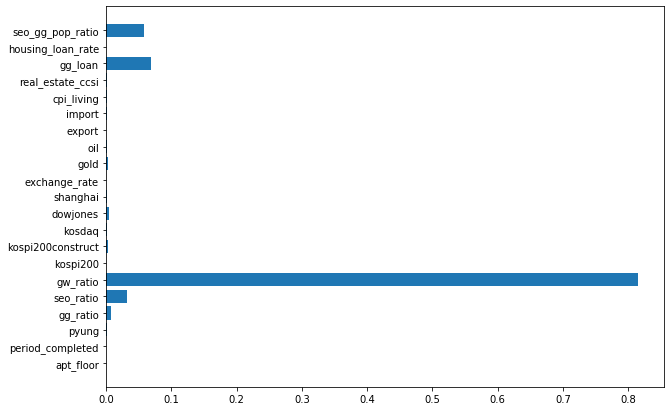

In [24]:
plt.figure(figsize=(10, 7))
plt.barh(range(x_train.shape[1]), dtr.feature_importances_)
plt.yticks(range(x_train.shape[1]), x_train.columns)
plt.show()

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
rfr = RandomForestRegressor()
rfr.fit(x_train_nor, y_train)
print('train score: ', rfr.score(x_train_nor, y_train))
print('test score: ', rfr.score(x_test_nor, y_test))

train score:  0.9990579191030013
test score:  0.9884706002655622


In [27]:
rfr.feature_importances_

array([6.00666084e-04, 4.93752311e-04, 9.74791275e-04, 1.75812167e-02,
       2.65573944e-02, 8.15440810e-01, 1.10895179e-03, 5.26935658e-03,
       8.23726521e-04, 4.19662359e-03, 1.42661593e-03, 6.71100279e-04,
       3.50332465e-03, 1.75263660e-03, 1.04886131e-03, 9.04373687e-04,
       6.96359963e-04, 1.50592707e-03, 8.60243093e-02, 1.50474391e-03,
       2.79144585e-02])

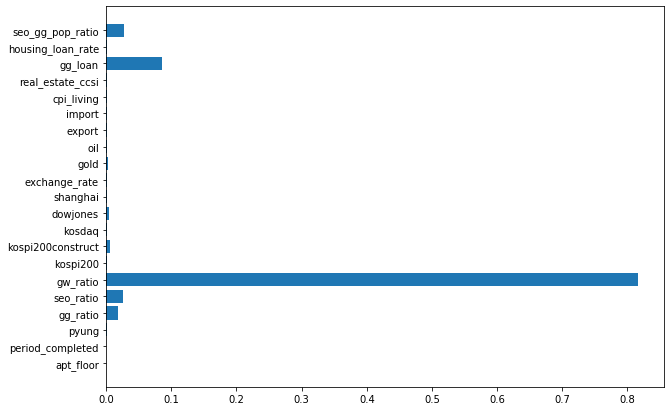

In [28]:
plt.figure(figsize=(10, 7))
plt.barh(range(x_train.shape[1]), rfr.feature_importances_)
plt.yticks(range(x_train.shape[1]), x_train.columns)
plt.show()

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

In [31]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train_nor, y_train)
print('train score: ', gbr.score(x_train_nor, y_train))
print('test score: ', gbr.score(x_test_nor, y_test))

train score:  0.9966056446343389
test score:  0.9893225414852328


In [32]:
gbr.feature_importances_

array([1.01714058e-05, 1.61466434e-05, 6.32302075e-05, 1.09896306e-02,
       1.29101017e-02, 8.29360624e-01, 2.29991645e-03, 2.00815584e-02,
       1.46376325e-03, 7.42391982e-03, 1.26350488e-03, 4.26187251e-05,
       5.17054535e-04, 8.59824080e-04, 1.01782094e-03, 6.43774846e-04,
       4.31633811e-04, 8.27707158e-04, 8.54046024e-02, 3.02226150e-04,
       2.40701701e-02])

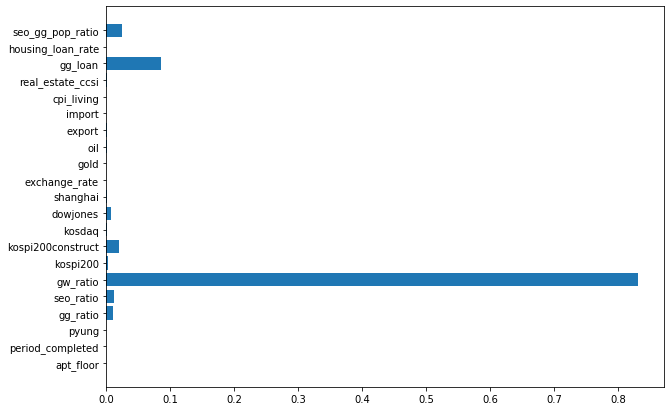

In [73]:
plt.figure(figsize=(10, 7))
plt.barh(range(x_train.shape[1]), gbr.feature_importances_)
plt.yticks(range(x_train.shape[1]), x_train.columns)
plt.show()

In [34]:
from sklearn.svm import SVR

In [35]:
svr = SVR()
svr.fit(x_train_nor, y_train)
print('train score: ', svr.score(x_train_nor, y_train))
print('test score: ', svr.score(x_test_nor, y_test))

train score:  -0.004735706068130341
test score:  -0.0024968211644427196


In [36]:
# print(x_test[0])
# print(svr.predict([x_test[0]]))
# print(svr.decision_function([x_test[0]]))
# print(svr.predict_proba([x_test[0]]))

## cross_val_score, GridSearchCV, Pipeline

In [81]:
from sklearn.model_selection import cross_val_score

In [83]:
lr = LinearRegression()
scores = cross_val_score(lr, x_train_nor, y_train, cv=10)
print(scores)
print(np.mean(scores))

[0.89430519 0.90748624 0.89411786 0.89357404 0.88393071 0.90774832
 0.89044013 0.84635533 0.76255705 0.8968474 ]
0.8777362270975712


In [85]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

kfold = KFold(n_splits=3, shuffle=True)
# kfold = StratifiedKFold(n_splits=3)
scores = cross_val_score(lr, x_train_nor, y_train, cv=kfold)
print(scores)
print(np.mean(scores))

[0.89173766 0.89503439 0.84077911]
0.8758503889526232


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {'n_estimators': [100, 200, 300, 400, 500],
              'max_depth': [None, 5, 10, 15, 20]}

gsc = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, return_train_score=True)

gsc.fit(x_train_nor, y_train) # 5 * 5 * 3번 반복

print(gsc.best_score_)
print(gsc.best_params_)
print(gsc.score(x_test_nor, y_test))

result = pd.DataFrame(gsc.cv_results_)
result.iloc[:, 4:].head()

0.9909661858815295
{'max_depth': 15, 'n_estimators': 400}
0.988065404659631


,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,None,100,"{'max_depth': None, 'n_estimators': 100}",0.992022,0.991598,0.988512,0.990711,0.001564,12,0.998682,0.998657,0.998701,0.998680,0.000018
1,None,200,"{'max_depth': None, 'n_estimators': 200}",0.992056,0.991843,0.988459,0.990786,0.001648,8,0.998706,0.998740,0.998764,0.998737,0.000024
2,None,300,"{'max_depth': None, 'n_estimators': 300}",0.992060,0.991944,0.988174,0.990726,0.001805,10,0.998626,0.998718,0.998742,0.998695,0.000050
3,None,400,"{'max_depth': None, 'n_estimators': 400}",0.991990,0.992039,0.988148,0.990726,0.001823,11,0.998668,0.998719,0.998767,0.998718,0.000041
4,None,500,"{'max_depth': None, 'n_estimators': 500}",0.992014,0.992098,0.988238,0.990784,0.001800,9,0.998728,0.998759,0.998777,0.998755,0.000020


In [46]:
from sklearn.model_selection import cross_val_score

rfr2 = RandomForestRegressor(n_estimators=400, max_depth=15, random_state=42)
scores = cross_val_score(rfr2, x_train_nor, y_train, cv=10)
print(scores)
print(np.mean(scores))


[0.99280711 0.99444167 0.99223876 0.9924465  0.99302417 0.99539901
 0.99175688 0.98771945 0.990499   0.99598407]
0.9926316620234023


In [48]:
rfr2.fit(x_train_nor, y_train)
rfr2.score(x_test_nor, y_test)

0.9884288596800783

In [49]:
param_grid = {'n_estimators': [100, 200, 300, 400, 500],
              'max_depth': [3, 6, 9, 12, 15]}

gsc2 = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=3, return_train_score=True)

gsc2.fit(x_train_nor, y_train) # 5 * 5 * 3번 반복

print(gsc2.best_score_)
print(gsc2.best_params_)
print(gsc2.score(x_test_nor, y_test))

result2 = pd.DataFrame(gsc2.cv_results_)
result2.iloc[:, 4:].head()

0.9967085071845913
{'max_depth': 3, 'n_estimators': 500}
0.9924084584401179


,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.994054,0.992958,0.991423,0.992812,0.001079,10,0.996773,0.996544,0.996783,0.996700,0.000110
1,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.995759,0.995819,0.994257,0.995278,0.000723,4,0.998455,0.998471,0.998488,0.998471,0.000014
2,3,300,"{'max_depth': 3, 'n_estimators': 300}",0.996806,0.996692,0.995079,0.996193,0.000788,3,0.999041,0.999053,0.999064,0.999053,0.000009
3,3,400,"{'max_depth': 3, 'n_estimators': 400}",0.996810,0.997081,0.995345,0.996412,0.000763,2,0.999329,0.999349,0.999358,0.999345,0.000012
4,3,500,"{'max_depth': 3, 'n_estimators': 500}",0.997177,0.997256,0.995693,0.996709,0.000719,1,0.999511,0.999504,0.999520,0.999512,0.000006


In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

pipe = Pipeline([
    ('selector', DataFrameSelector(list(x_train))),
    ("std_scaler", StandardScaler()), 
    ("gbr", GradientBoostingRegressor())])

# pipe.fit(x_train, y_train)
# pipe.score(x_test, y_test)

In [74]:
print(pipe.steps)

[('selector', DataFrameSelector(attribute_names=['apt_floor', 'period_completed', 'pyung',
                                   'gg_ratio', 'seo_ratio', 'gw_ratio',
                                   'kospi200', 'kospi200construct', 'kosdaq',
                                   'dowjones', 'shanghai', 'exchange_rate',
                                   'gold', 'oil', 'export', 'import',
                                   'cpi_living', 'real_estate_ccsi', 'gg_loan',
                                   'housing_loan_rate', 'seo_gg_pop_ratio'])), ('std_scaler', StandardScaler()), ('gbr', GradientBoostingRegressor())]


In [75]:
from sklearn.pipeline import make_pipeline

pipe_short = make_pipeline(DataFrameSelector(list(x_train)), 
                           StandardScaler(),
                           GradientBoostingRegressor())

In [76]:
print(pipe_short.steps)

[('dataframeselector', DataFrameSelector(attribute_names=['apt_floor', 'period_completed', 'pyung',
                                   'gg_ratio', 'seo_ratio', 'gw_ratio',
                                   'kospi200', 'kospi200construct', 'kosdaq',
                                   'dowjones', 'shanghai', 'exchange_rate',
                                   'gold', 'oil', 'export', 'import',
                                   'cpi_living', 'real_estate_ccsi', 'gg_loan',
                                   'housing_loan_rate', 'seo_gg_pop_ratio'])), ('standardscaler', StandardScaler()), ('gradientboostingregressor', GradientBoostingRegressor())]


In [59]:
param_grid = {'gbr__n_estimators': [100, 500 ],#, 600, 700],
              'gbr__max_depth': [3, 6]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(x_train, y_train)

print("최상의 교차 검증 정확도: ", grid.best_score_)
print("테스트 세트 점수: ", grid.score(x_test, y_test))
print("최적의 매개변수: {}".format(grid.best_params_))

최상의 교차 검증 정확도:  0.9970400496237278
테스트 세트 점수:  0.9982483910106756
최적의 매개변수: {'gbr__max_depth': 3, 'gbr__n_estimators': 500}


In [61]:
# pd.DataFrame(grid.cv_results_)

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [64]:
test_pred = grid.predict(x_test)
grid_mse = mean_squared_error(y_test, test_pred)
grid_rmse = np.sqrt(grid_mse)
print('grid rmse: ', grid_rmse)

grid_mae = mean_absolute_error(y_test, test_pred)
print('grid mae: ', grid_mae)

grid rmse:  87981.08746752322
grid mae:  63085.831461399874


In [71]:
print(test_pred[:10])
print(y_test.values[:10])

[ 8677022.80655999 13325347.36484473 10186884.83856115 11547991.52054177
  8776773.43765567 10813552.57003959  9177323.12890271  8605968.1582532
  9025248.13818952  8742950.27010825]
[ 8670891. 13252800. 10247399. 11541886.  8812744. 10792539.  9268631.
  8612843.  9197594.  8636687.]


In [77]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준편차:", scores.std())

# display_scores(tree_rmse_scores)